In [17]:
import torch
from skimage.data import shepp_logan_phantom
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import rotate, resize

In [8]:
original = shepp_logan_phantom()

In [9]:
print(type(original))

<class 'numpy.ndarray'>


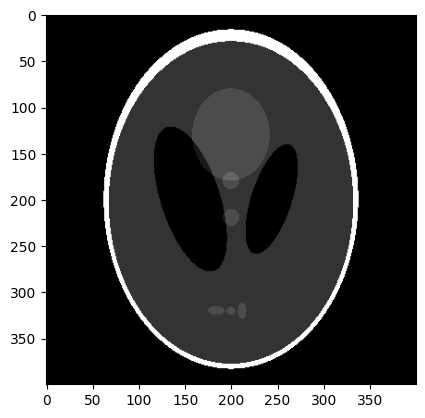

In [11]:
plt.imshow(original, cmap = 'gray')

In [16]:
print(original.shape)

(400, 400)


In [37]:
mw = np.ones((original.shape[0], original.shape[1]))
print(mw.shape)

(400, 400)


(400, 400)


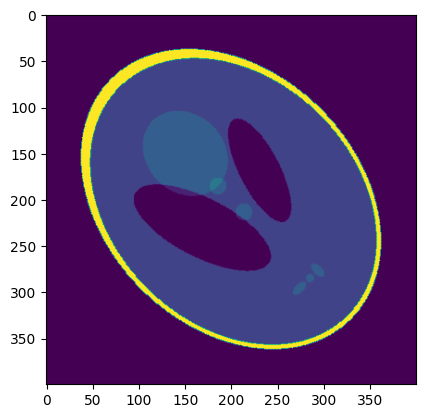

In [47]:
rotated_45 = rotate(original, 45)
rotated_90 = rotate(original, 90)
rotated_135 = rotate(original, 135)

rotated_180 = rotate(original, 180)
rotated_225 = rotate(original, 225)
rotated_270 = rotate(original, 270)
print(rotated_45.shape)
plt.imshow(rotated_45)

In [48]:
q_original = torch.fft.fftshift(torch.fft.fftn(torch.Tensor(original)))
q_45  = torch.fft.fftshift(torch.fft.fftn(torch.Tensor(rotated_45)))
q_90  = torch.fft.fftshift(torch.fft.fftn(torch.Tensor(rotated_90)))
q_135 = torch.fft.fftshift(torch.fft.fftn(torch.Tensor(rotated_135)))
q_180 = torch.fft.fftshift(torch.fft.fftn(torch.Tensor(rotated_180)))
q_225 = torch.fft.fftshift(torch.fft.fftn(torch.Tensor(rotated_225)))
q_270 = torch.fft.fftshift(torch.fft.fftn(torch.Tensor(rotated_270)))

In [27]:
print(np.linspace(-10, 10, num = 20))

[-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
  -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
   0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
   5.78947368   6.84210526   7.89473684   8.94736842  10.        ]


In [49]:
x, y = np.meshgrid(np.linspace(- int(original.shape[0]/2) , int(original.shape[0]/2), num = int(original.shape[0])), 
                   np.linspace(- int(original.shape[0]/2) , int(original.shape[0]/2), num = int(original.shape[0])))

In [30]:
deg_to_rad = 60 / 360 * 2 * np.pi

In [34]:
print(np.where(x < np.cos(deg_to_rad), 1, 0).shape)

(400, 400)


In [40]:
print(np.cos(deg_to_rad))

0.5000000000000001


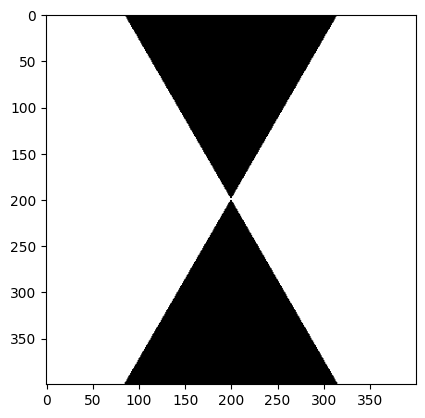

In [50]:
plt.imshow(mw * np.where(np.abs(np.arctan(y/x)) < (np.pi/3), 1, 0), cmap = "gray")

In [51]:
stationary_mask = torch.Tensor(mw * np.where(np.abs(np.arctan(y/x)) < (np.pi/3), 1, 0))

In [52]:
p0 = torch.fft.ifftn(q_original * stationary_mask)
p1 = torch.fft.ifftn(q_45* stationary_mask)
p2 = torch.fft.ifftn(q_90* stationary_mask)
p3 = torch.fft.ifftn(q_135* stationary_mask)
p4 = torch.fft.ifftn(q_180* stationary_mask)
p5 = torch.fft.ifftn(q_225* stationary_mask)
p6 = torch.fft.ifftn(q_270* stationary_mask)

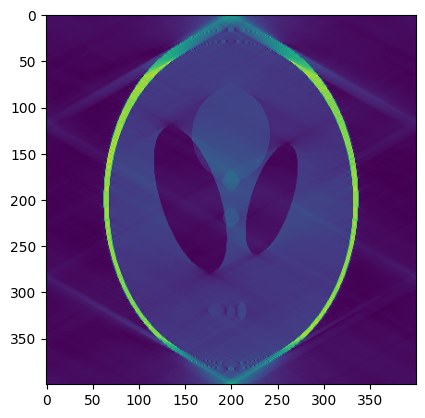

In [55]:
plt.imshow(torch.abs(p0).numpy())

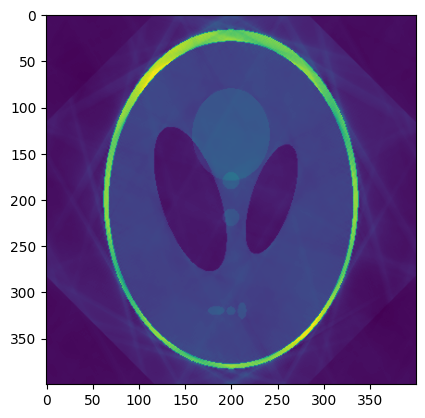

In [56]:
rotated_back = 0
for index, item in enumerate([p0,p1,p2,p3,p4,p5,p6]):
    rotated_back += rotate(torch.abs(item).numpy(), -1 * index * 45)
rotated_back = rotated_back / 7
plt.imshow(rotated_back)